In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
df = pd.read_csv("bank-additional-full.csv")

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Initialize the encoder with the correct argument
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Select columns to encode
categorical_columns = ['housing', 'loan', 'marital', 'education', 'job', 'month', 'day_of_week', 'default', 'contact', 'poutcome']

# Fit the encoder and transform the data
encoded_data = encoder.fit_transform(df[categorical_columns])

# Create a DataFrame with the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate with the original DataFrame
df_encoded = pd.concat([df.drop(categorical_columns, axis=1), encoded_df], axis=1)

# Map the target variable
df_encoded['y'] = df_encoded['y'].map({'yes': 1, 'no': 0})


In [5]:
feature_exclude = ['y']
X = df_encoded.drop(feature_exclude, axis = 1)
y = df_encoded['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Decision Tree

In [6]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

model = DecisionTreeClassifier().fit(X_train, y_train)

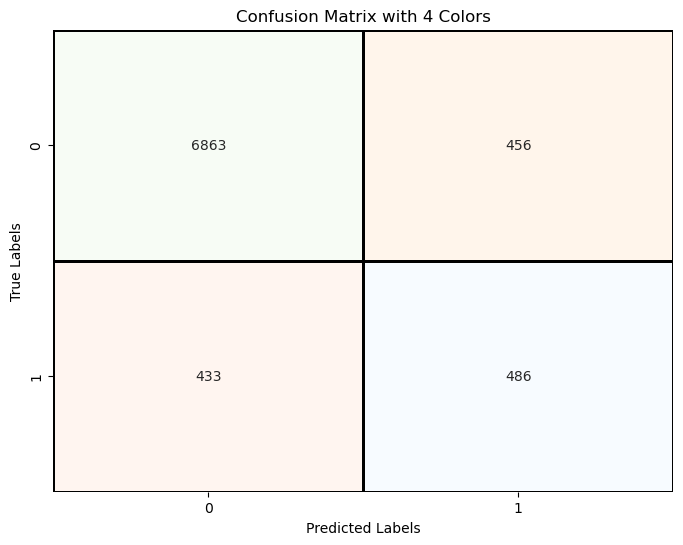

In [7]:
# Predicting the test set results
y_pred = model.predict(X_test)

# Calculating the performance metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Storing the metrics in a list
DT = [accuracy, recall, f1, precision, confusion]
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are already defined
confusion = confusion_matrix(y_test, y_pred)

# Create masks for each of the four quadrants
mask_tp = np.zeros_like(confusion, dtype=bool)  # True Positives
mask_tn = np.zeros_like(confusion, dtype=bool)  # True Negatives
mask_fp = np.zeros_like(confusion, dtype=bool)  # False Positives
mask_fn = np.zeros_like(confusion, dtype=bool)  # False Negatives

# Set the appropriate elements to True
mask_tp[0, 0] = True
mask_tn[1, 1] = True
mask_fp[0, 1] = True
mask_fn[1, 0] = True

plt.figure(figsize=(8, 6))

# Plot each quadrant with different colors
sns.heatmap(confusion, annot=True, fmt='d', mask=~mask_tp, cmap='Greens', cbar=False, linewidths=1, linecolor='black')  # TP - Green
sns.heatmap(confusion, annot=True, fmt='d', mask=~mask_tn, cmap='Blues', cbar=False, linewidths=1, linecolor='black')   # TN - Blue
sns.heatmap(confusion, annot=True, fmt='d', mask=~mask_fp, cmap='Oranges', cbar=False, linewidths=1, linecolor='black') # FP - Orange
sns.heatmap(confusion, annot=True, fmt='d', mask=~mask_fn, cmap='Reds', cbar=False, linewidths=1, linecolor='black')    # FN - Red

plt.title('Confusion Matrix with 4 Colors')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression().fit(X_train, y_train)

/Users/prakashpandey/Documents/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


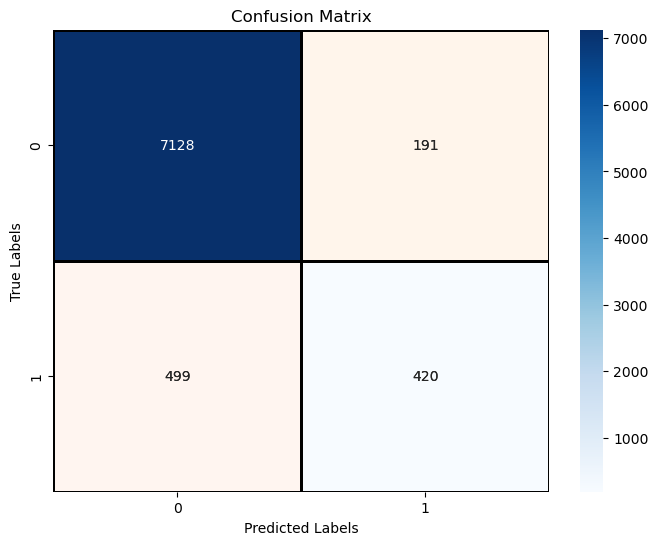

In [9]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precesion = precision_score(y_test, y_pred)
confussion = confusion_matrix(y_test, y_pred)

LR = [accuracy, recall, f1, precesion, confussion]
# Assuming y_test and y_pred are already defined
confusion = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix with default settings
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=True)
sns.heatmap(confusion, annot=True, fmt='d', mask=~mask_tn, cmap='Blues', cbar=False, linewidths=1, linecolor='black')   # TN - Blue
sns.heatmap(confusion, annot=True, fmt='d', mask=~mask_fp, cmap='Oranges', cbar=False, linewidths=1, linecolor='black') # FP - Orange
sns.heatmap(confusion, annot=True, fmt='d', mask=~mask_fn, cmap='Reds', cbar=False, linewidths=1, linecolor='black')    # FN - Red
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# Support Vector Machine

In [11]:
from sklearn.svm import SVC

model = SVC(kernel = 'linear').fit(X_train, y_train)

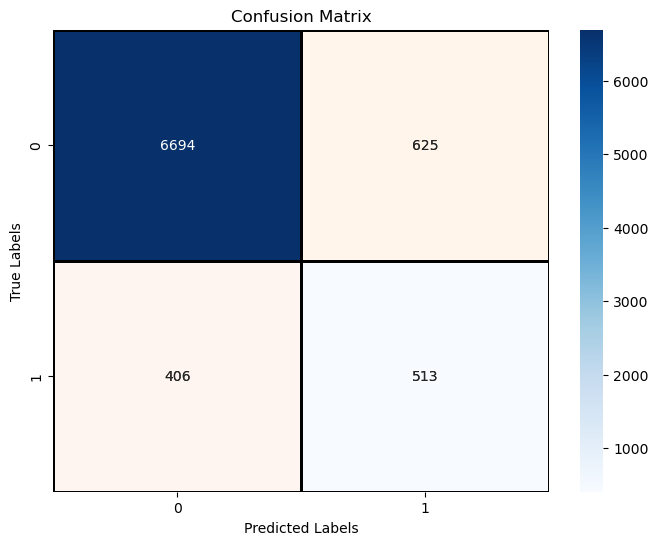

In [12]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precesion = precision_score(y_test, y_pred)
confussion = confusion_matrix(y_test, y_pred)

SVM = [accuracy, recall, f1, precesion, confussion]
# Assuming y_test and y_pred are already defined
confusion = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix with default settings
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=True)
sns.heatmap(confusion, annot=True, fmt='d', mask=~mask_tn, cmap='Blues', cbar=False, linewidths=1, linecolor='black')   # TN - Blue
sns.heatmap(confusion, annot=True, fmt='d', mask=~mask_fp, cmap='Oranges', cbar=False, linewidths=1, linecolor='black') # FP - Orange
sns.heatmap(confusion, annot=True, fmt='d', mask=~mask_fn, cmap='Reds', cbar=False, linewidths=1, linecolor='black')    # FN - Red
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier().fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precesion = precision_score(y_test, y_pred)
confussion = confusion_matrix(y_test, y_pred)

RF = [accuracy, recall, f1, precesion, confussion]
sns.heatmap(confussion)

# Neural Network 

In [ ]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier().fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precesion = precision_score(y_test, y_pred)
confussion = confusion_matrix(y_test, y_pred)

NN = [accuracy, recall, f1, precesion, confussion]
sns.heatmap(confussion)

# Evaluation

In [ ]:
eval = pd.DataFrame({
    'Decesion Tree': DT, 
    'Random Forest': RF, 
    'Support Vector Machine': SVM, 
    'Logestic Regression': LR, 
    'Neural Network': NN
}, index = ['accuracy', 'recall', 'f1', 'precesion', 'confussion'])
eval